# Scope

The objective of this project is to detect if the given tweet is related to a real disaster or not. Simply, we need to differentiate the real disaster tweet from non real one.

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
import nltk
import re
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [2]:
# uploading data
Home = "../data/"
train = pd.read_csv(Home + "train.csv")
test = pd.read_csv(Home+ "test.csv")

In [3]:
train.head(30)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [4]:
non_disaster = train[train['target'] == 0]

In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
disaster = train[train['target'] == 1]

## Analysis of Data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
# checking the size of data
train.shape

(7613, 5)

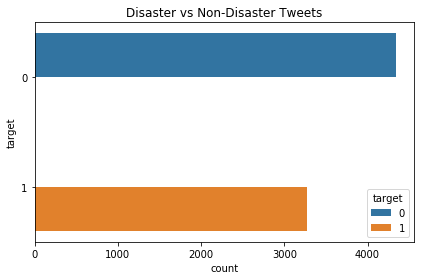

In [9]:
sns.countplot(y=train['target'], data=train, hue=train['target']).set_title("Disaster vs Non-Disaster Tweets")
plt.tight_layout()

In [10]:
# checking null values
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [11]:
# filling missing data for keyword and location columns
train.loc[:,'keyword_cleansed'] = train['keyword']
train.loc[:,'location_cleansed'] = train['location']
train['keyword_cleansed'].fillna("NoKeyword", inplace = True)
train['location_cleansed'].fillna("NoLocation", inplace = True)

In [12]:
# checking unqiue category for keywords and location
ls_keyword = train['keyword'].unique()
ls_location = train['location'].unique()
print("No of keyword", ls_keyword.size)
print("No of location", ls_location.size)

No of keyword 222
No of location 3342


In [13]:
# Cleaning keyword and location for special characters, lowercase letter and for unique words using lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def word_processor(text):
    text.lower().replace('[^\w\s]','')
    return wordnet_lemmatizer.lemmatize(text)

#train.keyword=train.keyword.astype(str)
train['keyword_cleansed'] = train.keyword_cleansed.apply(word_processor)
train['location_cleansed'] = train.location_cleansed.apply(word_processor)

In [14]:
train.head(10)

,id,keyword,location,text,target,keyword_cleansed,location_cleansed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,NoKeyword,NoLocation
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,NoKeyword,NoLocation
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,NoKeyword,NoLocation
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,NoKeyword,NoLocation
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,NoKeyword,NoLocation
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1,NoKeyword,NoLocation
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1,NoKeyword,NoLocation
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1,NoKeyword,NoLocation
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1,NoKeyword,NoLocation
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1,NoKeyword,NoLocation


In [15]:
# checking unqiue category for keywords and location after cleaning the data
ls_keyword = train['keyword_cleansed'].unique()
ls_location = train['location_cleansed'].unique()
print("No of keyword", ls_keyword.size)
print("No of location", ls_location.size)

No of keyword 214
No of location 3341


In [16]:
ls_keyword

array(['NoKeyword', 'ablaze', 'accident', 'aftershock',
       'airplane%20accident', 'ambulance', 'annihilated', 'annihilation',
       'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack',
       'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism',
       'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard',
       'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualty',
       'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'debris', 'deluge',
       'deluged', 'demolish', 'demolished', 'demolition', 'derail',
       'derailed', 'derailm

In [17]:
#checking correlation for keywords and location with target
train['keyword_cleansed']=train['keyword_cleansed'].astype('category').cat.codes
train['location_cleansed']=train['location_cleansed'].astype('category').cat.codes
train.corr()

,id,target,keyword_cleansed,location_cleansed
id,1.000000,0.060781,0.976439,0.015469
target,0.060781,1.000000,0.047912,0.002697
keyword_cleansed,0.976439,0.047912,1.000000,0.013571
location_cleansed,0.015469,0.002697,0.013571,1.000000


## A) Data cleaning: 
- Removing unnecessary data i.e keyword and location information as it seems irrelavent from disaster information (after looking at correlation) .

In [18]:
tweets = train[['text', 'target']]
tweets.head(20)

,text,target
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,"13,000 people receive #wildfires evacuation orders in California",1
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,I'm on top of the hill and I can see a fire in the woods...,1
8,There's an emergency evacuation happening now in the building across the street,1
9,I'm afraid that the tornado is coming to our area...,1


## B) Data Analysis:

In [19]:
tweets.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [20]:
tweets.describe()

,target
count,7613.00000
mean,0.42966
std,0.49506
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [21]:
tweets.groupby('target').describe()

text         \
       count unique   
target                
0       4342   4315   
1       3271   3206   

                                                                                                                                                  \
                                                                                                                                             top   
target                                                                                                                                             
0                    He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam   
1       11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...   

             
       freq  
target       
0         4  
1        10

<b>Understanding the impact of Hashtags on tweets<b>

In [22]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [23]:
# extracting hashtags from non racist/sexist tweets

HT_non_real = hashtag_extract(tweets['text'][tweets['target'] == 0])

# extracting hashtags from racist/sexist tweets
HT_real = hashtag_extract(tweets['text'][tweets['target'] == 1])

# unnesting list
HT_non_real = sum(HT_non_real,[])
HT_real = sum(HT_real,[])

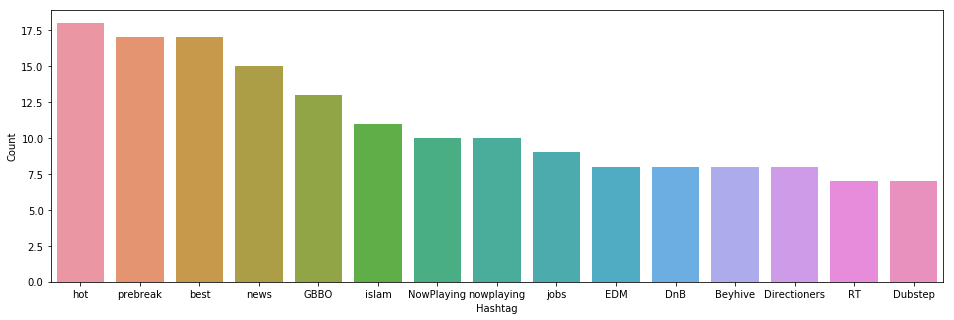

In [24]:
a = nltk.FreqDist(HT_non_real)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

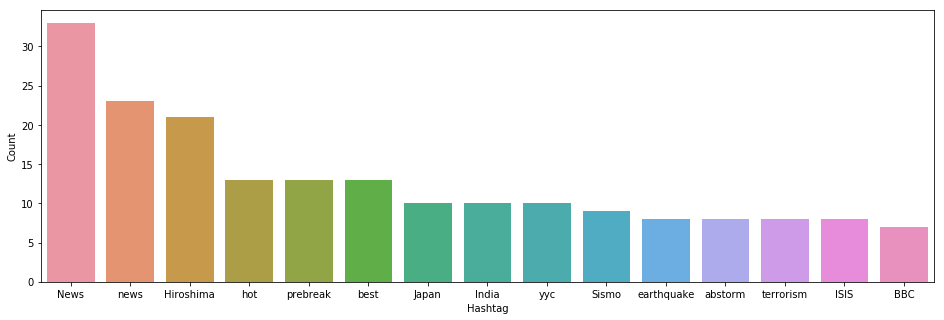

In [25]:
a = nltk.FreqDist(HT_real)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 15) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [26]:
tweets['length'] = tweets['text'].apply(len)

/Users/sandy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
tweets.head()

,text,target,length
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,133
3,"13,000 people receive #wildfires evacuation orders in California",1,65
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,88


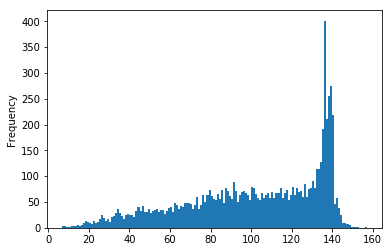

In [28]:
tweets.length.plot.hist(bins=150)

In [29]:
tweets.length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c832438>,
      dtype=object)

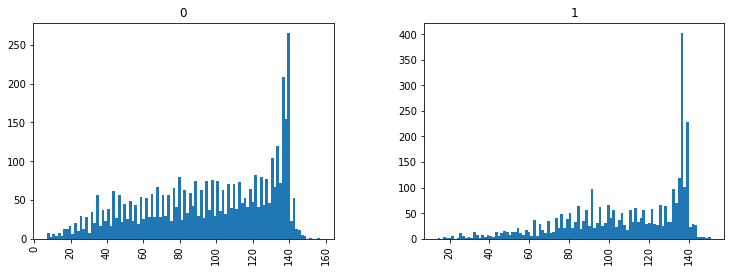

In [30]:
tweets.hist(column='length',by='target',bins=100,figsize=(12, 4))

## c) Text Processing:
- Removing Punctuations and Special Characters
- Removing StopWords
- Stemming 
- Tokenizing

In [31]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/sandy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
def text_process(tweet):
    nopunc = [char for char in tweet if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    unsteemed =  [word for word in nopunc.split() if word.lower() not in stopwords.words('english') and len(word) > 3]
    return list(map(lambda n: stemmer.stem(n),unsteemed))

In [34]:
tweets.head()

,text,target,length
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,69
1,Forest fire near La Ronge Sask. Canada,1,38
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,133
3,"13,000 people receive #wildfires evacuation orders in California",1,65
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,88


In [35]:
tokenized_tweet = tweets
tokens = tokenized_tweet['text'].apply(text_process)


In [36]:
for i in range(len(tokens)):
    tokens[i] = ' '.join(tokens[i])
    
tokenized_tweet['tokenize tweets'] = tokens

/Users/sandy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
tokenized_tweet.head()

,text,target,length,tokenize tweets
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,69,deed reason earthquak allah forgiv
1,Forest fire near La Ronge Sask. Canada,1,38,forest fire near rong sask canada
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,133,resid ask shelter place notifi offic evacu shelter place order expect
3,"13,000 people receive #wildfires evacuation orders in California",1,65,13000 peopl receiv wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,88,sent photo rubi alaska smoke wildfir pour school


### A) Understanding the common words used in the tweets using WordCloud

In [38]:
!pip install wordcloud

Let’s visualize all the words our data using the wordcloud plot.


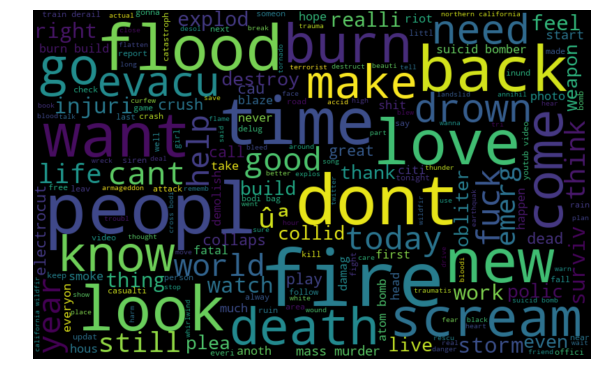

In [39]:
all_words = ' '.join([text for text in tweets['tokenize tweets']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### B) Words in non disaster tweets

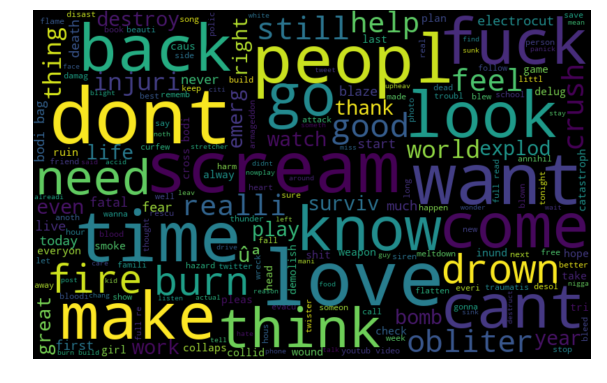

In [40]:
nonreal_words =' '.join([text for text in tweets['tokenize tweets'][tweets['target'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(nonreal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


### C) Words in  disaster tweets

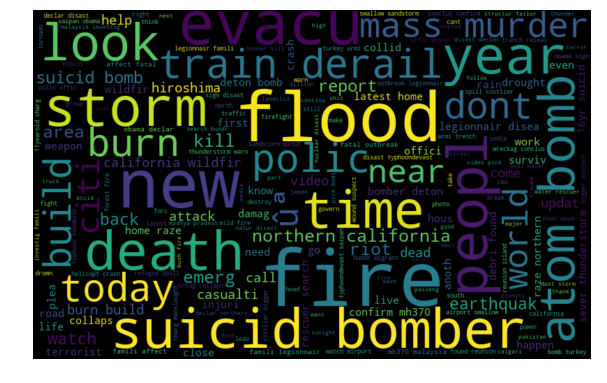

In [41]:
real_words = ' '.join([text for text in tweets['tokenize tweets'][tweets['target'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(real_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [43]:
tweets_train, tweets_test, target_train, target_test = train_test_split(tweets['text'], tweets['target'], test_size=0.3)

In [44]:
tweets_train.head()

5534    #hot  Reddit's new content policy goes into effect many horrible subreddits banned or quarantined http://t.co/VhrLsWvZql #prebreak #best
4540                                   Photos: 17 people killed and over 25 injured in deadly Saudi Mosque suicide attack http://t.co/geEKnwJJSz
1142                                                The cryptic words that guided pilots on the Hiroshima bombing mission http://t.co/39IAbcC5pK
1053                Womens Handbags Cross Body Geometric Pattern Satchel Totes Shoulder Bags White http://t.co/L1GFXgOZvx http://t.co/TKJYbjjsKl
2841    #Myanmar  Displaced #Rohingya at #Sittwe point of no return http://t.co/cgf61fPmR0  #Prison like conditions #genocide IHHen MSF Refugees
Name: text, dtype: object

In [45]:
pipeline = Pipeline([
    ('bag of words', CountVectorizer(analyzer=text_process)),
    ('term freq. in doc. freq.', TfidfTransformer()),
    ('Classifier', MultinomialNB())
])

In [46]:
pipeline.fit(tweets_train, target_train)

Pipeline(memory=None,
     steps=[('bag of words', CountVectorizer(analyzer=<function text_process at 0x11c46f510>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproces...f=False, use_idf=True)), ('Classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [47]:
prediction = pipeline.predict(tweets_test)

In [48]:
from sklearn.metrics import classification_report

print(classification_report(target_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83      1296
           1       0.86      0.63      0.72       988

   micro avg       0.79      0.79      0.79      2284
   macro avg       0.81      0.77      0.78      2284
weighted avg       0.80      0.79      0.79      2284



# Tensor Flow Implementation

In [49]:
train.head()

,id,keyword,location,text,target,keyword_cleansed,location_cleansed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,0,1867
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,0,1867
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,0,1867
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,0,1867
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,0,1867


In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

/Users/sandy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sandy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sandy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sandy/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [51]:
X_train, X_test, y_train, y_test = train_test_split(tweets['text'].values, tweets['target'].values, test_size=0.3, random_state=42)

In [52]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X_train)
messages_bow = bow_transformer.transform(X_train)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow).toarray()

In [53]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [54]:
model.fit(x=messages_tfidf,y=y_train,epochs=100, validation_split=0.1)

Train on 4796 samples, validate on 533 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
4796/4796 [==============================] - 5s 1ms/sample - loss: 0.6399 - val_loss: 0.5200
Epoch 2/100
4796/4796 [==============================] - 3s 637us/sample - loss: 0.3587 - val_loss: 0.4438
Epoch 3/100
4796/4796 [==============================] - 3s 628us/sample - loss: 0.1652 - val_loss: 0.4731
Epoch 4/100
4796/4796 [==============================] - 3s 716us/sample - loss: 0.0817 - val_loss: 0.5153
Epoch 5/100
4796/4796 [==============================] - 4s 799us/sample - loss: 0.0432 - val_loss: 0.5693
Epoch 6/100
4796/4796 [==============================] - 3s 676us/sample - loss: 0.0261 - val_loss: 0.6155
Epoch 7/100
4796/4796 [==============================] - 4s 740us/sample - loss: 0.0187 - val_loss: 0.6476
Epoch 8/100
4796/4796 [==============================] - 7s 2ms/sample - loss: 0.0169 - val_loss: 0.6657
Epoch 9/100
4796/4796 [==============================

4796/4796 [==============================] - 3s 651us/sample - loss: 0.0072 - val_loss: 0.9298
Epoch 75/100
4796/4796 [==============================] - 3s 565us/sample - loss: 0.0074 - val_loss: 0.9332
Epoch 76/100
4796/4796 [==============================] - 3s 627us/sample - loss: 0.0071 - val_loss: 0.9288
Epoch 77/100
4796/4796 [==============================] - 3s 625us/sample - loss: 0.0067 - val_loss: 0.9470
Epoch 78/100
4796/4796 [==============================] - 3s 634us/sample - loss: 0.0068 - val_loss: 0.9470
Epoch 79/100
4796/4796 [==============================] - 3s 570us/sample - loss: 0.0069 - val_loss: 0.9516
Epoch 80/100
4796/4796 [==============================] - 3s 641us/sample - loss: 0.0068 - val_loss: 0.9652
Epoch 81/100
4796/4796 [==============================] - 4s 910us/sample - loss: 0.0068 - val_loss: 0.9463
Epoch 82/100
4796/4796 [==============================] - 3s 603us/sample - loss: 0.0067 - val_loss: 0.9410
Epoch 83/100
4796/4796 [=================

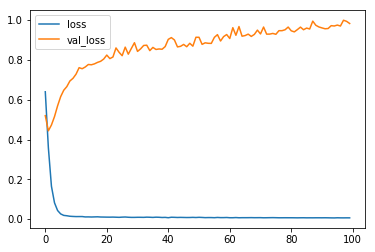

In [55]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [56]:
#validation loss increasing so we may need to do early stopping based on validation loss 

from tensorflow.keras.callbacks import EarlyStopping

In [57]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [58]:
model.fit(x=messages_tfidf,y=y_train,epochs=100,validation_split=0.1, callbacks=[early_stop])

Train on 4796 samples, validate on 533 samples
Epoch 1/100
4796/4796 [==============================] - 4s 811us/sample - loss: 0.6262 - val_loss: 0.5080
Epoch 2/100
4796/4796 [==============================] - 3s 578us/sample - loss: 0.3447 - val_loss: 0.4425
Epoch 3/100
4796/4796 [==============================] - 3s 673us/sample - loss: 0.1580 - val_loss: 0.4782
Epoch 4/100
4796/4796 [==============================] - 4s 766us/sample - loss: 0.0731 - val_loss: 0.5198
Epoch 5/100
4796/4796 [==============================] - 4s 870us/sample - loss: 0.0380 - val_loss: 0.5776
Epoch 00005: early stopping


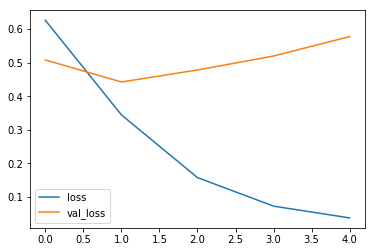

In [59]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [60]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x=messages_tfidf,y=y_train,epochs=100,validation_split=0.1,callbacks=[early_stop])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 4796 samples, validate on 533 samples
Epoch 1/100
4796/4796 [==============================] - 5s 1ms/sample - loss: 0.6809 - val_loss: 0.6472
Epoch 2/100
4796/4796 [==============================] - 3s 684us/sample - loss: 0.5709 - val_loss: 0.4947
Epoch 3/100
4796/4796 [==============================] - 3s 581us/sample - loss: 0.3959 - val_loss: 0.4516
Epoch 4/100
4796/4796 [==============================] - 3s 624us/sample - loss: 0.2870 - val_loss: 0.4609
Epoch 5/100
4796/4796 [==============================] - 3s 594us/sample - loss: 0.2095 - val_loss: 0.5045
Epoch 6/100
4796/4796 [==============================] - 4s 833us/sample - loss: 0.1515 - val_loss: 0.5150
Epoch 00006: early stopping


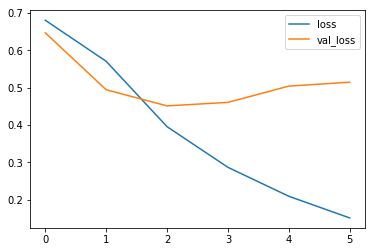

In [61]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [62]:
messages_bow_test = bow_transformer.transform(X_test)
messages_tfidf_test = tfidf_transformer.transform(messages_bow_test).toarray()

In [63]:
model.evaluate(messages_tfidf,y_train)

5329/5329 [==============================] - 1s 184us/sample - loss: 0.1164


0.11636580666361125

In [64]:
model.evaluate(messages_tfidf_test,y_test)

2284/2284 [==============================] - 0s 176us/sample - loss: 0.6121


0.6121009355459864

In [65]:
predictions = model.predict_classes(messages_tfidf_test)

In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1318
           1       0.70      0.75      0.73       966

   micro avg       0.76      0.76      0.76      2284
   macro avg       0.76      0.76      0.76      2284
weighted avg       0.76      0.76      0.76      2284

